<a href="https://colab.research.google.com/github/rkrisanoff/Ifmo-3.1-Artificial-intelligence-systems/blob/master/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

MNIST - датасет образцов рукописного написания цифр, является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения. Образцы из набора NIST были нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей. 

In [ ]:
from keras.datasets import mnist
(X_train_origin, y_train_origin), (X_test_origin, y_test_origin) = mnist.load_data()

Первый элемент

response(отклик) of this object 0


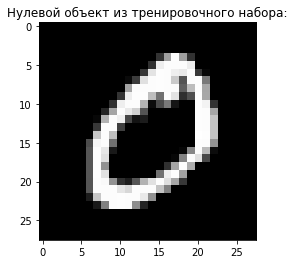

In [ ]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train_origin[1], cmap="gray")
print(f'response(отклик) of this object {y_train_origin[1]}')

In [ ]:
min_variance = 0.8
tested_class = 1

Для разделения данных используем функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_splited_origin, X_test_splited_origin, y_train_splited_origin, y_test_splited_origin =  train_test_split(X_train_origin, y_train_origin, test_size=0.3, random_state=2022)

Преобразуем данные

In [ ]:
dim = 784 # 28*28 picules for picules
X_train = X_train_splited_origin.reshape(len(X_train_splited_origin), dim)
X_test = X_test_splited_origin.reshape(len(X_test_splited_origin), dim)

Уменьшим размерность тестовых данных

In [ ]:
from sklearn.decomposition import PCA
N_components = 69
pca = PCA(n_components=N_components, svd_solver='full')
modelPCA = pca.fit(X_train) 

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance
min_n_components = 1
while  min_n_components < len(explained_variance) and explained_variance[min_n_components-1] < min_variance : 
  min_n_components+=1
print(f"minimum count of components we need to have a {min_variance} variance is {min_n_components}")
pca = PCA(n_components=min_n_components, svd_solver='full')
modelPCA = pca.fit(X_train) 

minimum count of components we need to have a 0.8 variance is 43


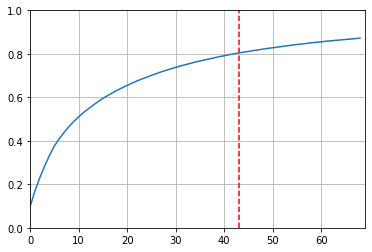

In [ ]:
plt.grid()
plt.xlim(0,69)
plt.ylim(0,1)
plt.plot(np.full(10,min_n_components),np.linspace(0,1,10),'r--')
plt.plot(np.arange(N_components), explained_variance, ls = '-')
plt.show()

In [ ]:
X_train_transformed = modelPCA.transform(X_train)


Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2022)
clf = OneVsRestClassifier(tree).fit(X_train_transformed, y_train_splited_origin)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [ ]:
modelPCA = pca.fit(X_test) 
X_test_transformed = modelPCA.transform(X_test)

In [ ]:
y_train_pred = clf.predict(X_train_transformed)

In [ ]:
y_test_pred = clf.predict(X_test_transformed)
y_test_pred_probably = clf.predict_proba(X_test_transformed)

In [ ]:
print(y_test_pred)
print(y_test_splited_origin)

[7 7 4 ... 7 9 3]
[7 5 3 ... 2 9 4]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
CM = confusion_matrix(y_test_splited_origin, y_test_pred)
print(f"confusion matrix")
print(CM)
print(f"accuracy equals {accuracy_score(y_test_splited_origin, y_test_pred)}")
for index, (recall, precision) in enumerate(zip(
    recall_score(
        y_test_splited_origin,
        y_test_pred, average=None
    ),
    precision_score(
        y_test_splited_origin,
        y_test_pred, average=None
    )
)):
    print(f"for {index} class:  recall - {recall}, precision - {precision}")


confusion matrix
[[1577    0   17   11   16   55   42   34   18   10]
 [   0 1152    5    9  308   12    5  249    2  287]
 [  42    2  949   23  217   26  216  135   76  150]
 [  19    5   45  447  260  157   18  400   97  424]
 [  32   40  644  268  183  153   46    3  375   41]
 [  64    5   51  131   79  859   31  143  149  117]
 [  38    1  146    2   38   36 1476   22    8   16]
 [  80   71  206  713   18   44    4  559   99   41]
 [  18    3   85   81  207   54   21   69  996  170]
 [  49   43  321  422   85  202   28   53  482   62]]
accuracy equals 0.4588888888888889
for 0 class:  recall - 0.8859550561797753, precision - 0.8217821782178217
for 1 class:  recall - 0.5677673730901922, precision - 0.8714069591527988
for 2 class:  recall - 0.5168845315904139, precision - 0.3843661401377076
for 3 class:  recall - 0.2387820512820513, precision - 0.2121499762695776
for 4 class:  recall - 0.10252100840336134, precision - 0.12969525159461376
for 5 class:  recall - 0.52731737262124, prec

In [ ]:
# for i in range(10):
  # print(f"for {i} correctly classified {i} is {CM[i][i]}")
print(f"for {tested_class} class correctly classified is {CM[tested_class][tested_class]}")


for 0 correctly classified 0 is 1577
for 1 correctly classified 1 is 1152
for 2 correctly classified 2 is 949
for 3 correctly classified 3 is 447
for 4 correctly classified 4 is 183
for 5 correctly classified 5 is 859
for 6 correctly classified 6 is 1476
for 7 correctly classified 7 is 559
for 8 correctly classified 8 is 996
for 9 correctly classified 9 is 62


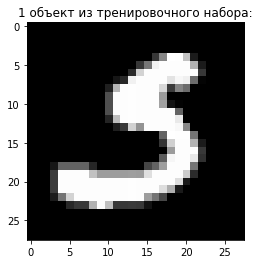

predicted    for 1 is 7
origin class for 1 is 5
probability of being assigned to a class 7 equals 0.271


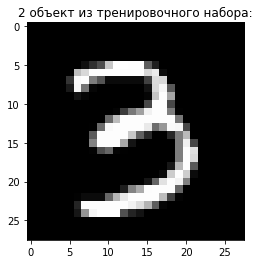

predicted    for 2 is 4
origin class for 2 is 3
probability of being assigned to a class 4 equals 0.26


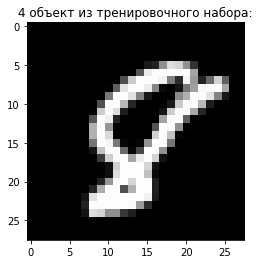

predicted    for 4 is 8
origin class for 4 is 8
probability of being assigned to a class 8 equals 0.466


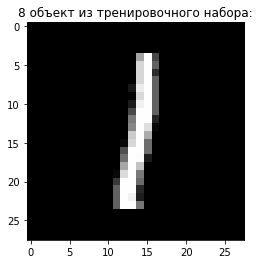

predicted    for 8 is 1
origin class for 8 is 1
probability of being assigned to a class 1 equals 0.466


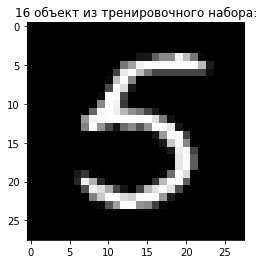

predicted    for 16 is 5
origin class for 16 is 5
probability of being assigned to a class 5 equals 0.387


In [ ]:
for i in [2**i for i in range(5)]:
  plt.title(f"{i} объект из тренировочного набора:")
  plt.imshow(X_test_splited_origin[i], cmap="gray")
  plt.show()
  print(f"predicted    for {i} is {y_test_pred[i]}")
  print(f"origin class for {i} is {y_test_splited_origin[i]}")
  print(f"probability of being assigned to a class {y_test_pred[i]} equals {round(y_test_pred_probably[i][y_test_pred[i]],3)}")
